In [2]:
# Import required libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
#Github: https://github.com/sujitmandal

#This programe is create by Sujit Mandal

"""
Github: https://github.com/sujitmandal
This programe is create by Sujit Mandal

LinkedIn : https://www.linkedin.com/in/sujit-mandal-91215013a/

Facebook : https://www.facebook.com/sujit.mandal.33671748

Twitter : https://twitter.com/mandalsujit37
"""

'\nGithub: https://github.com/sujitmandal\nThis programe is create by Sujit Mandal\n\nLinkedIn : https://www.linkedin.com/in/sujit-mandal-91215013a/\n\nFacebook : https://www.facebook.com/sujit.mandal.33671748\n\nTwitter : https://twitter.com/mandalsujit37\n'

In [4]:
data = pd.read_csv('diabetes.csv')
print(data.head(5))
print('\n')
print(data.tail(5))
print('\n')
print(data.shape)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766  

In [5]:
class_names = ['Healthy', 'Sick']

In [6]:
transpose = data.describe().transpose()
print(transpose)

                          count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinT

In [7]:
target_column = ['Outcome']
predictors = list(set(list(data.columns)) - set(target_column)) 
data[predictors] = data[predictors] / data[predictors].max()
predictors_transpose = data.describe().transpose()

print(predictors_transpose)

                          count      mean       std       min       25%  \
Pregnancies               768.0  0.226180  0.198210  0.000000  0.058824   
Glucose                   768.0  0.607510  0.160666  0.000000  0.497487   
BloodPressure             768.0  0.566438  0.158654  0.000000  0.508197   
SkinThickness             768.0  0.207439  0.161134  0.000000  0.000000   
Insulin                   768.0  0.094326  0.136222  0.000000  0.000000   
BMI                       768.0  0.476790  0.117499  0.000000  0.406855   
DiabetesPedigreeFunction  768.0  0.194990  0.136913  0.032231  0.100723   
Age                       768.0  0.410381  0.145188  0.259259  0.296296   
Outcome                   768.0  0.348958  0.476951  0.000000  0.000000   

                               50%       75%  max  
Pregnancies               0.176471  0.352941  1.0  
Glucose                   0.587940  0.704774  1.0  
BloodPressure             0.590164  0.655738  1.0  
SkinThickness             0.232323  0.323

In [8]:
#Creating the Training and Test Datasets

x = data[predictors].values
y = data[target_column].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=40)

print('\n')
print(x_train.shape)
print(x_test.shape)



(537, 8)
(231, 8)


In [9]:
#Building, Predicting, and Evaluating the Neural Network Model

mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), activation = 'relu', solver ='adam', max_iter = 500)
mlp.fit(x_train, y_train)

predict_train = mlp.predict(x_train)
predict_test = mlp.predict(x_test)

/home/sujit/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sujit/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [10]:
predicted = mlp.predict(x_test)
accuracy = accuracy_score(y_test, predicted)

accuracyInpercentage = (accuracy * 100)
print('Accuracy :', accuracyInpercentage)

Accuracy : 74.45887445887446




Confusion matrix, without normalization
[[122  20]
 [ 39  50]]


Normalized confusion matrix
[[0.85915493 0.14084507]
 [0.43820225 0.56179775]]


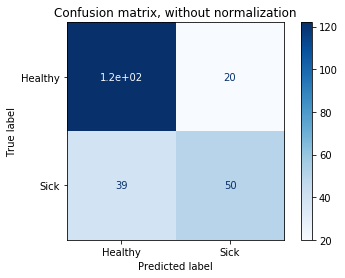

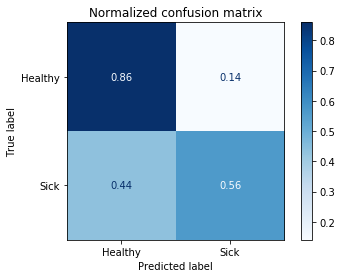

In [11]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(mlp, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    print('\n')
    print(title)
    print(disp.confusion_matrix)

plt.show()

In [12]:
print('Classification Report:')
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train, target_names=class_names))

Classification Report:
[[318  40]
 [ 66 113]]
              precision    recall  f1-score   support

     Healthy       0.83      0.89      0.86       358
        Sick       0.74      0.63      0.68       179

    accuracy                           0.80       537
   macro avg       0.78      0.76      0.77       537
weighted avg       0.80      0.80      0.80       537

